## Creating a `MNIST Kaleidoscope`

In [3]:
import os, sys
%load_ext autoreload
%autoreload 2
print(sys.prefix)

import matplotlib.pyplot as plt
import numpy as np
import pickle
import pandas as pd

# Local imports
from kaleidoscope.utils import data_processing as dp
import kaleidoscope.main as kals

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
/anaconda/envs/kals


### Load and prepare MNIST data

- NOTE: If norm is [-1, 1\] use `tanh` as the non-linearity.

Loading MNIST data
Train data details:
Batch: images & labels size (torch.Size([10000, 1, 28, 28]), torch.Size([10000]))
Total batches = 6
Test data details:
Batch: images & labels size (torch.Size([10000, 1, 28, 28]), torch.Size([10000]))
Total batches = 1


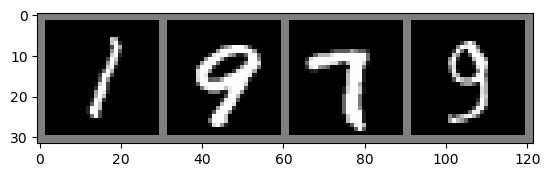

Pixels range (min, max) = (tensor(-1.), tensor(1.))


In [6]:
# Load the image dataset
data_path = '../../hshrivastava/externalData'
batch_size = 10000
image_norm='-1to1'
trainloader, testloader = dp.load_image_data('MNIST', data_path, batch_size, image_norm=image_norm)
dp.visualize_image_dataset(trainloader, image_norm=image_norm)

In [7]:
# Prepare the input for manifold learning
X_train, image_metadata = dp.prepare_image_input_manifold_learning(trainloader) # BxD
X_test, _ = dp.prepare_image_input_manifold_learning(testloader)
X_train

,c1_w1_h1,c1_w1_h2,c1_w1_h3,c1_w1_h4,c1_w1_h5,c1_w1_h6,c1_w1_h7,c1_w1_h8,c1_w1_h9,c1_w1_h10,...,c1_w28_h19,c1_w28_h20,c1_w28_h21,c1_w28_h22,c1_w28_h23,c1_w28_h24,c1_w28_h25,c1_w28_h26,c1_w28_h27,c1_w28_h28
0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,...,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0
1,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,...,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0
2,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,...,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0
3,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,...,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0
4,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,...,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59995,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,...,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0
59996,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,...,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0
59997,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,...,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0
59998,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,...,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0


### Manifold Learning (MNIST)

In [8]:
# Experiment parameters
curr_GPU = 'cuda:0'
model_type = 'MLP' 

Using "cuda:0" compute
Means of selected features (c1_w1_h1     -1.000000
c1_w1_h2     -1.000000
c1_w1_h3     -1.000000
c1_w1_h4     -1.000000
c1_w1_h5     -1.000000
                ...   
c1_w28_h24   -0.999984
c1_w28_h25   -1.000000
c1_w28_h26   -1.000000
c1_w28_h27   -1.000000
c1_w28_h28   -1.000000
Length: 784, dtype: float32, 784)
Normalizing the data: None
Scaler not applied
Initializing a DNN model
Manifold model initialized DNN(
  (MLP): Sequential(
    (0): Linear(in_features=784, out_features=500, bias=True)
    (1): ReLU()
    (2): Linear(in_features=500, out_features=500, bias=True)
    (3): ReLU()
    (4): Linear(in_features=500, out_features=500, bias=True)
    (5): ReLU()
    (6): Linear(in_features=500, out_features=500, bias=True)
    (7): ReLU()
    (8): Linear(in_features=500, out_features=500, bias=True)
    (9): ReLU()
    (10): Linear(in_features=500, out_features=500, bias=True)
    (11): ReLU()
    (12): Linear(in_features=500, out_features=500, bias=True)
    (

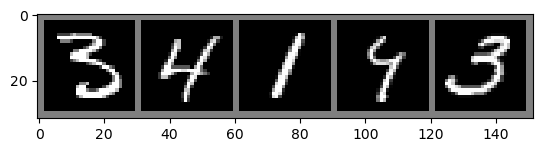

Recovered images torch.Size([1000, 784])


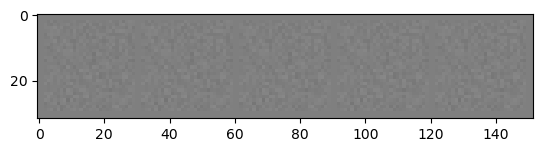

Updating the best model
Updating the best model
Updating the best model
Updating the best model
Updating the best model
Updating the best model
Updating the best model
Updating the best model
Updating the best model
Updating the best model
Updating the best model
epoch 1000

 epoch:1000/10000, loss=0.1406368464231491
Train images torch.Size([1000, 784])


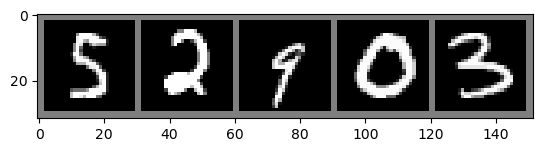

Recovered images torch.Size([1000, 784])


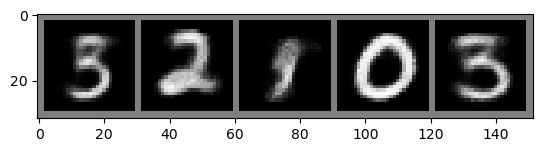

Updating the best model
Updating the best model
Updating the best model
Updating the best model
Updating the best model
Updating the best model
Updating the best model
Updating the best model
Updating the best model
Updating the best model
epoch 2000

 epoch:2000/10000, loss=0.11509149521589279
Train images torch.Size([1000, 784])


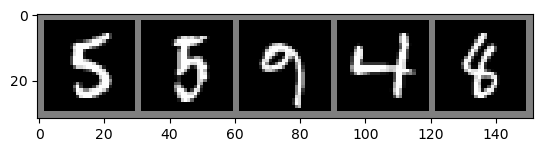

Recovered images torch.Size([1000, 784])


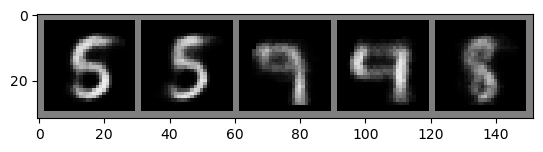

Updating the best model
Updating the best model
Updating the best model
Updating the best model
Updating the best model
Updating the best model
Updating the best model
epoch 3000

 epoch:3000/10000, loss=0.09702824801206589
Train images torch.Size([1000, 784])


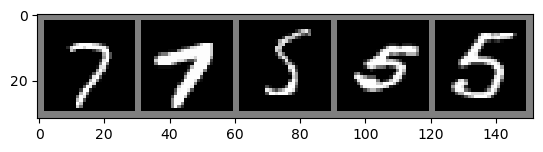

Recovered images torch.Size([1000, 784])


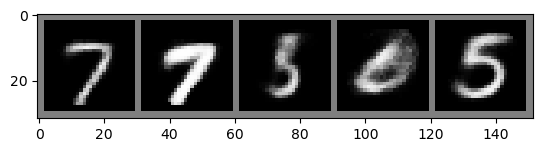

Updating the best model
Updating the best model
Updating the best model
Updating the best model
Updating the best model
epoch 4000

 epoch:4000/10000, loss=0.08497768640518188
Train images torch.Size([1000, 784])


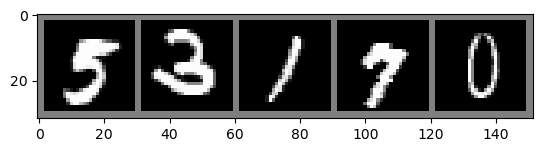

Recovered images torch.Size([1000, 784])


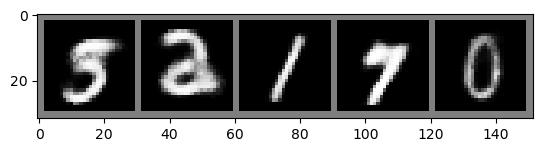

Updating the best model
Updating the best model
Updating the best model
Updating the best model
Updating the best model
epoch 5000

 epoch:5000/10000, loss=0.07554557919502258
Train images torch.Size([1000, 784])


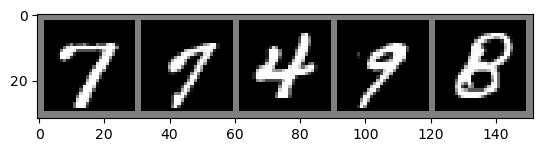

Recovered images torch.Size([1000, 784])


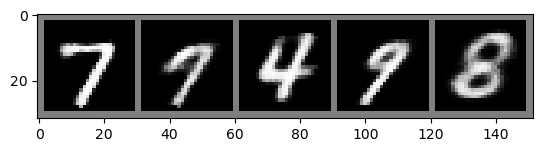

Updating the best model
Updating the best model
Updating the best model
Updating the best model
Updating the best model
epoch 6000

 epoch:6000/10000, loss=0.07227401435375214
Train images torch.Size([1000, 784])


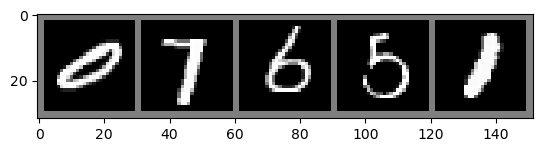

Recovered images torch.Size([1000, 784])


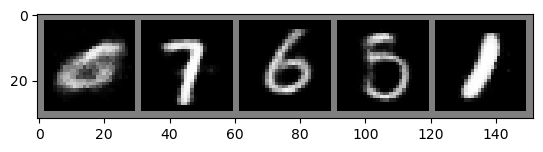

Updating the best model
Updating the best model
Updating the best model
epoch 7000

 epoch:7000/10000, loss=0.07008148729801178
Train images torch.Size([1000, 784])


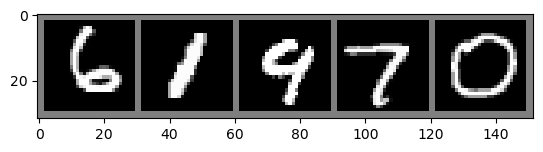

Recovered images torch.Size([1000, 784])


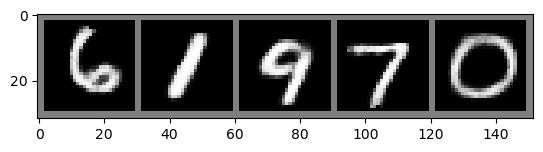

Updating the best model
Updating the best model
epoch 8000

 epoch:8000/10000, loss=0.06635119765996933
Train images torch.Size([1000, 784])


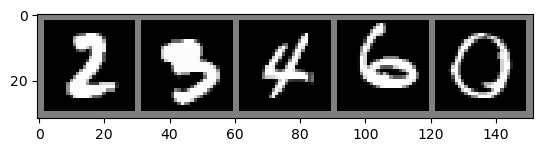

Recovered images torch.Size([1000, 784])


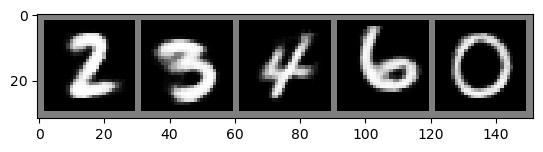

Updating the best model
Updating the best model
Updating the best model
Updating the best model
Updating the best model
epoch 9000

 epoch:9000/10000, loss=0.06395396590232849
Train images torch.Size([1000, 784])


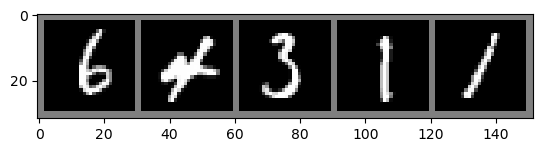

Recovered images torch.Size([1000, 784])


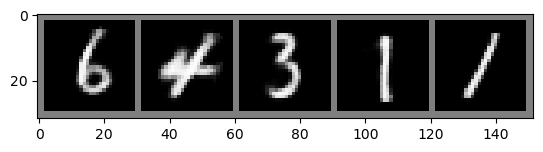

Updating the best model
Updating the best model
Updating the best model

 Train data fit


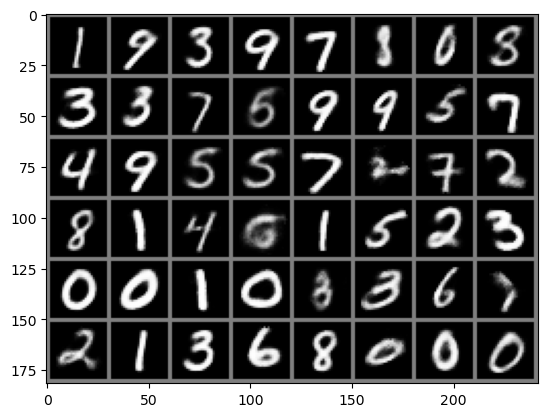

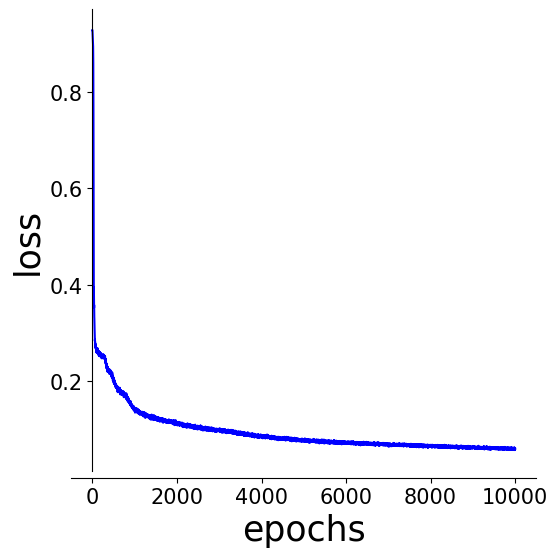

In [11]:
model_MNIST = kals.manifold_learning_image(
    X_train,
    hidden_dim=500,
    epochs=10000, 
    lr=0.0001, 
    BATCH_SIZE=min(1000, X_train.shape[0]),
    NORM=None,
    USE_CUDA=curr_GPU, 
    image_metadata=image_metadata,
    image_norm=image_norm,
    model_type=model_type,
    pretrained_model=None
)

### Run `Kaleidoscopic` Sampling

- Alternatively, a pre-trained model is provided below. (One can directly run from this cell downwards)

In [13]:
# Load a pre-trained model
folder = 'saved_models/'
filename = 'mnist_kaleidoscope.pickle'

with open(folder+filename, 'rb') as handle: # file object
    model_MNIST, model_type, image_metadata, image_norm = pickle.load(handle)

- Run `Kaleidoscopic Sampling` 

Using "cuda:0" compute


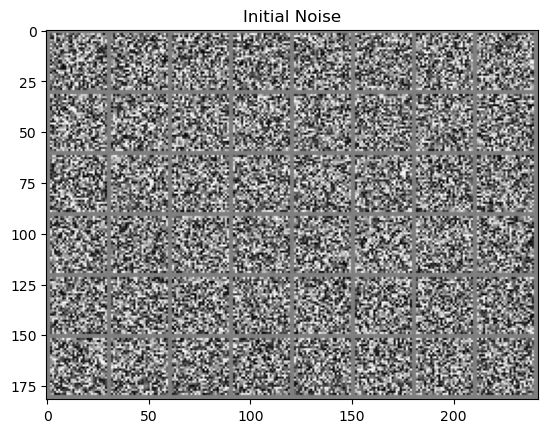

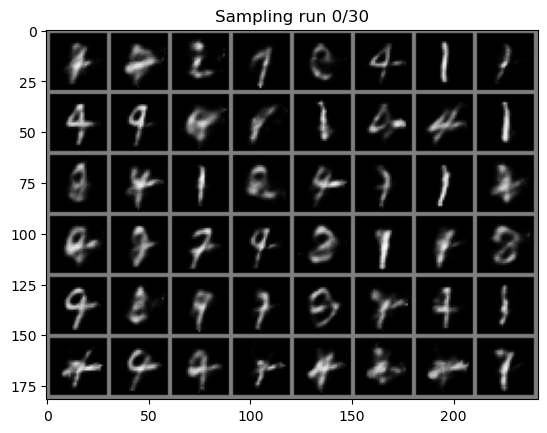

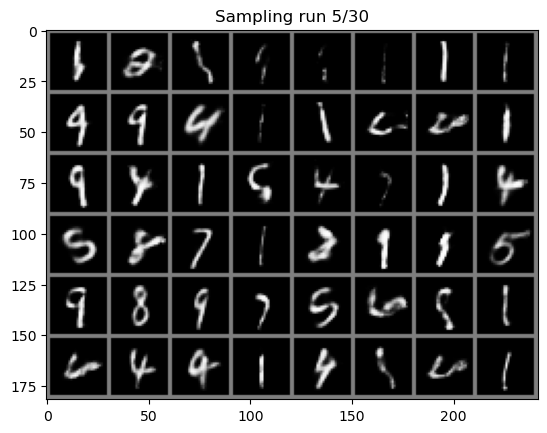

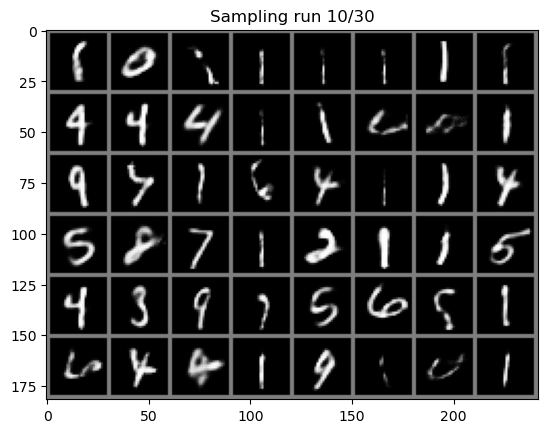

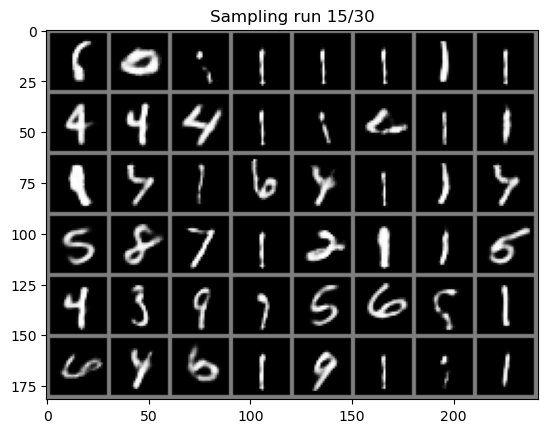

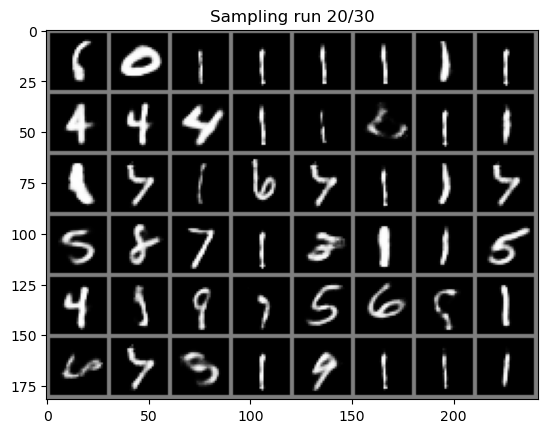

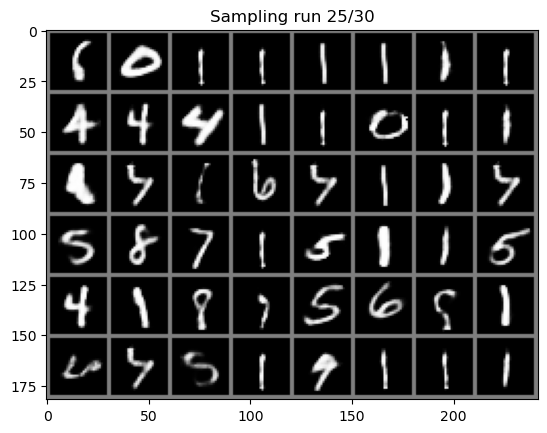

In [16]:
sampling_runs = 30
samples_folder = 'saved_images/mnist_samples/'
curr_GPU = 'cuda:0' 

Xs_MNIST = kals.get_kaleidoscopic_samples(
    model_MNIST[0], SAMPLING_RUNS=sampling_runs,
    model_type=model_type, image_metadata=image_metadata,
    NOISE='uniform', USE_CUDA=curr_GPU, SHOW_EVERY=5,
    image_norm=image_norm, eps=0.01, 
    folder=samples_folder
)